# MIRACL Regional Statistics and Visualization


## Aim

Given two groups of subjects that are segmented and registered to a study-specific atlas

1. Generates cell density heatmap: the voxelized and warped segmentation maps in each group are averaged and then subtracted to obtain group-wise heatmaps

2. Extracts features for each subject, such as cell density per atlas label, using voxelized and segmentation maps, and registration transforms. Outputs results of feature extraction as a CSV file.

4. Performs a paired t-test analysis between the two groups across all labels using the featured-extracted CSV files and outputs a CSV file of the results including the p-value for each atlas label.

5. Outputs nifti image of the brain atlas with labels coloured corresponding to the p-values from the t-test

## Heatmap Generation



### CLI

> The final file created by MIRACL will be located in the same folder as the current working directory. The files outputed are `group_1_mean_plot.tiff`, `group_2_mean_plot.tiff` and `group_difference_mean_plot.tiff`.

*To* run the heatmap generation from the command line, use the following syntax:

```
$ miracl stats heatmap_group \
  -g1 [ directory containing group 1 voxelized and warped segmentation maps ] \
  -g2 [ directory containing group 2 voxelized and warped segmentation maps ] \
  -v  [ voxel size used during warping ]
```

### Example Heatmap Generation
```
$ miracl stats heatmap_group \
  -g1 walking \
  -g2 non_walking \
  -v  25
```

### Example Output

#### Group 1 Mean
- Plots the average cell density across all subjects in group 1 for each atlas label
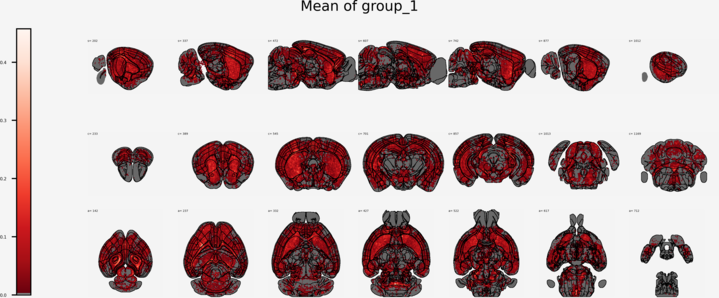

#### Group 2 Mean
- Plots the average cell density across all subjects in group 2 for each atlas label
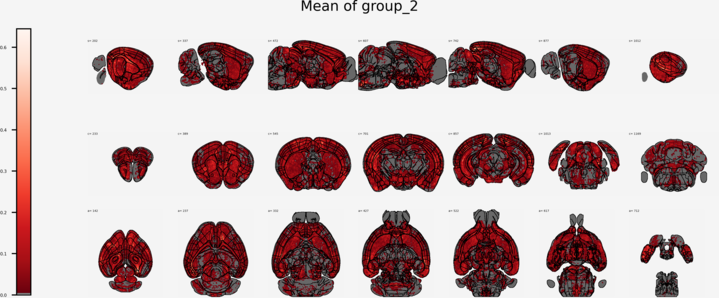

#### Cell Density Heatmap
- Plots the difference between the average cell density of two groups for each atlas label
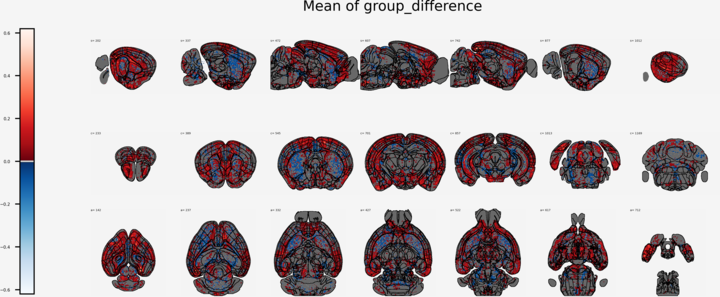

<a name="feat_extract"></a>
## Feature Extraction

- Feature extraction needs to be completed before running regional statistics MIRACL module
- An example of the information calculated in the feature extraction step is show in the [table](#tab1) and [image](#img1) below
- Information can be extracted for the whole brain or for various depths of the reference atlas

### CLI

> The final file created by MIRACL will be located in the same folder as the input tif file specified to the command. The file outputed is `clarity_segmentation_features_ara_labels.csv`.

*To* run the feature extraction from the command line, use the following syntax:

```
$ miracl seg feat_extract \
  -s [ voxelized binarized segmentation tif file ] \
  -l [ allen labels used to summarize features ]
```

- The segmented voxelized file is specified with flag `-s` and constitutes the raw data for calculating features.
- The allen labels supplied with flag `-l` must be registered to CLARITY and will typically look like this `reg_final/annotation_hemi_(hemi)_(vox)um_clar_vox.tif`. This file is produced after registration.

### Example Feature Extraction Generation
```
$ miracl seg feat_extract \
  -s voxelized_seg_sparse.tif \
  -l annotation_hemi_combined_25um_clar_vox.tif
```

An example raw output ([table](#tab1)) and formatted output ([image](#img1)) from this command can be found below.

### Example Output

<a name="tab1"></a>
#### Raw Tabular Data

| |LabelID|LabelAbrv|LabelName                                  |ParentID|IDPath                               |Count|Density            |VolumeAvg         |VolumeStd         |VolumeMax|
|------|-------|---------|-------------------------------------------|--------|-------------------------------------|-----|-------------------|------------------|------------------|---------|
|0     |1      |TMv      |Tuberomammillary nucleus, ventral part     |557.0   |/997/8/343/1129/1097/467/331/557/1/  |3.0  |2.073255010366275  |2.3333333333333335|1.247219128924647 |4.0      |
|1     |2      |SSp-m6b  |Primary somatosensory area, mouth, layer 6b|345.0   |/997/8/567/688/695/315/453/322/345/2/|11.0 |2.0630157539384846 |10.272727272727273|11.177013010402677|38.0     |
|2     |4      |IC       |Inferior colliculus                        |339.0   |/997/8/343/313/339/4/                |16.0 |0.05790492734741147|265.375           |325.5433678866765 |1195.0   |
|3     |6      |int      |internal capsule                           |784.0   |/997/1009/983/784/6/                 |13.0 |0.10187209566573414|42.46153846153846 |51.73841807907779 |173.0    |
|4     |7      |PSV      |Principal sensory nucleus of the trigeminal|1132.0  |/997/8/343/1065/771/1132/7/          |10.0 |0.22477971587843915|19.5              |19.68882932020083 |62.0     |


####  Fromatted Output
<a name="img1"></a>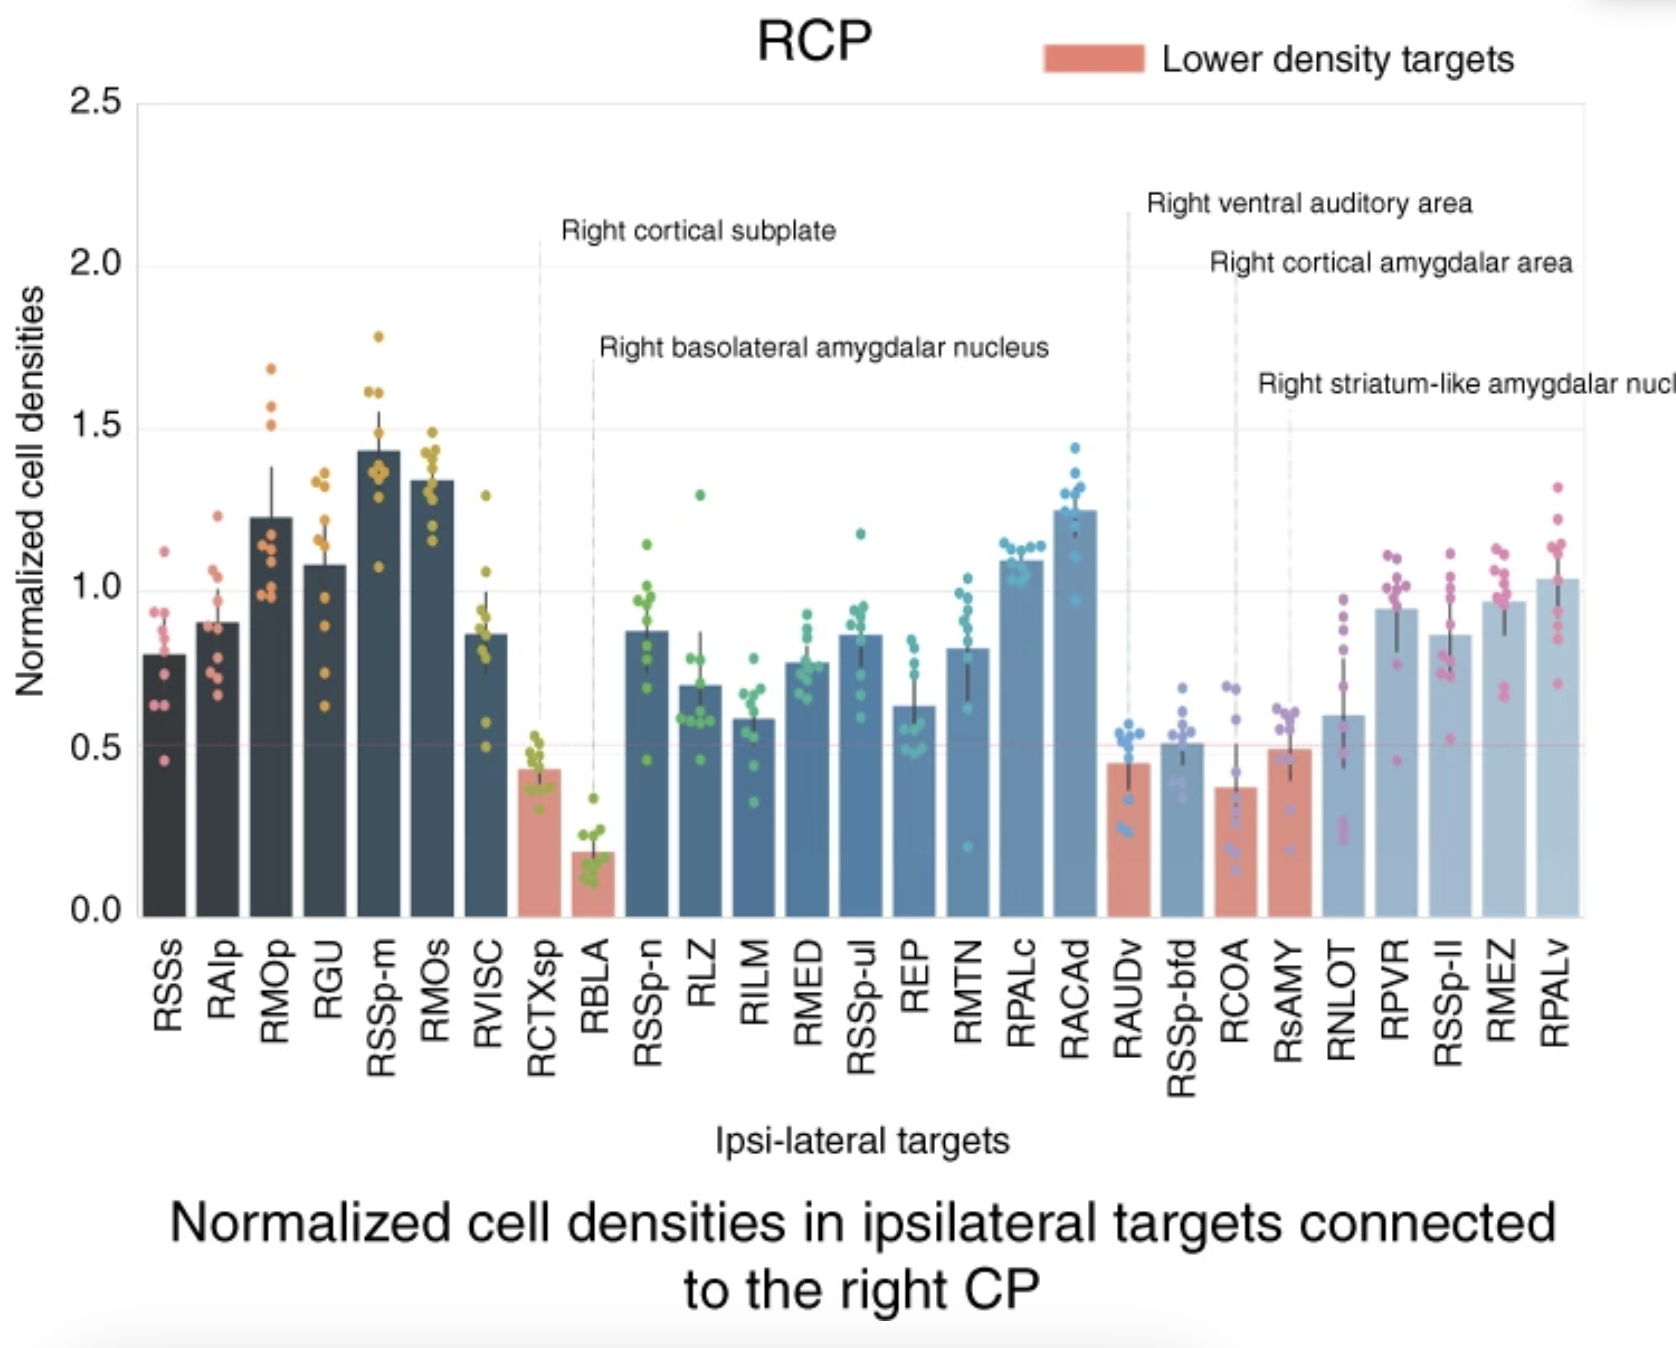

## Regional Stats and Heatmap

### CLI

> The final files created by MIRACL will be located in the same folder as the input file specified to the command. The two files output are `paired_ttest_test.csv` and `groupwise_ttest_pval.nii.gz`.

*To* run the regional statistics and heatmap from the command line, use the following syntax:

```
$ miracl stats group_ttest \
  -i [ input CSV file with extracted features ] \
  -p [ p-value to threshold heatmap image ]
```

- The command `group_ttest` only has a single required argument `-i`, which is the input CSV comparing features of two groups
  - This file contains all the combined feature extraction CSVs from each subject
- An optional argument is `-p` which specifies a `float` value between `0` and `1` that is used in creating the figure to highlight regions of the brain that have a certain threshold of p-value

### Example usage and dataset using the CLI


Produce t-test CSV file and p-value heatmap for input file `feature_extract_csv.csv`.

```
$ miracl stats group_ttest \
  -i feature_extract_csv.csv \
  -p 0.05
```

### Results of Regional Statistics
- The regional statistics will perform a paired t-test and output the results to a csv file named `paired_ttest_test.csv`
- A visualization of the contents of this file can be seen in the [image below](#pval).

#### Raw T-test Output
| |level_0|level_1|LabelID|LabelAbrv|LabelName                                                  |ParentID|IDPath                               |Tstat              |Pval                |
|------|-------|-------|-------|---------|-----------------------------------------------------------|--------|-------------------------------------|-------------------|--------------------|
|0     |0      |1      |2      |SSp-m6b  |Primary somatosensory area, mouth, layer 6b                |345.0   |/997/8/567/688/695/315/453/322/345/2/|0.24144343203382876|0.8301582249518327  |
|1     |1      |2      |4      |IC       |Inferior colliculus                                        |339.0   |/997/8/343/313/339/4/                |0.02648203510104747|0.9804733591306509  |
|2     |2      |3      |6      |int      |internal capsule                                           |784.0   |/997/1009/983/784/6/                 |4.283456279126712  |0.014845962648085114|
|3     |3      |4      |7      |PSV      |Principal sensory nucleus of the trigeminal                |1132.0  |/997/8/343/1065/771/1132/7/          |4.092602357086583  |0.019953021947634562|
|4     |5      |6      |9      |SSp-tr6a |Primary somatosensory area, trunk, layer 6a                |361.0   |/997/8/567/688/695/315/453/322/361/9/|5.289122082047926  |0.009452857110562528|
|5     |6      |7      |10     |SCig     |Superior colliculus, motor related, intermediate gray layer|294.0   |/997/8/343/313/323/294/10/           |0.23097410487369793|0.8374201184144706  |


#### Results of P-value Projection Visualization

- After conduting the t-test above, MIRACL will produce a visualization of the results
- MIRACL will project the p-values of the test onto an image of the reference atlas so that the difference between the groups can be visualized
- See an example projected heatmap below

<a name="pval"></a>
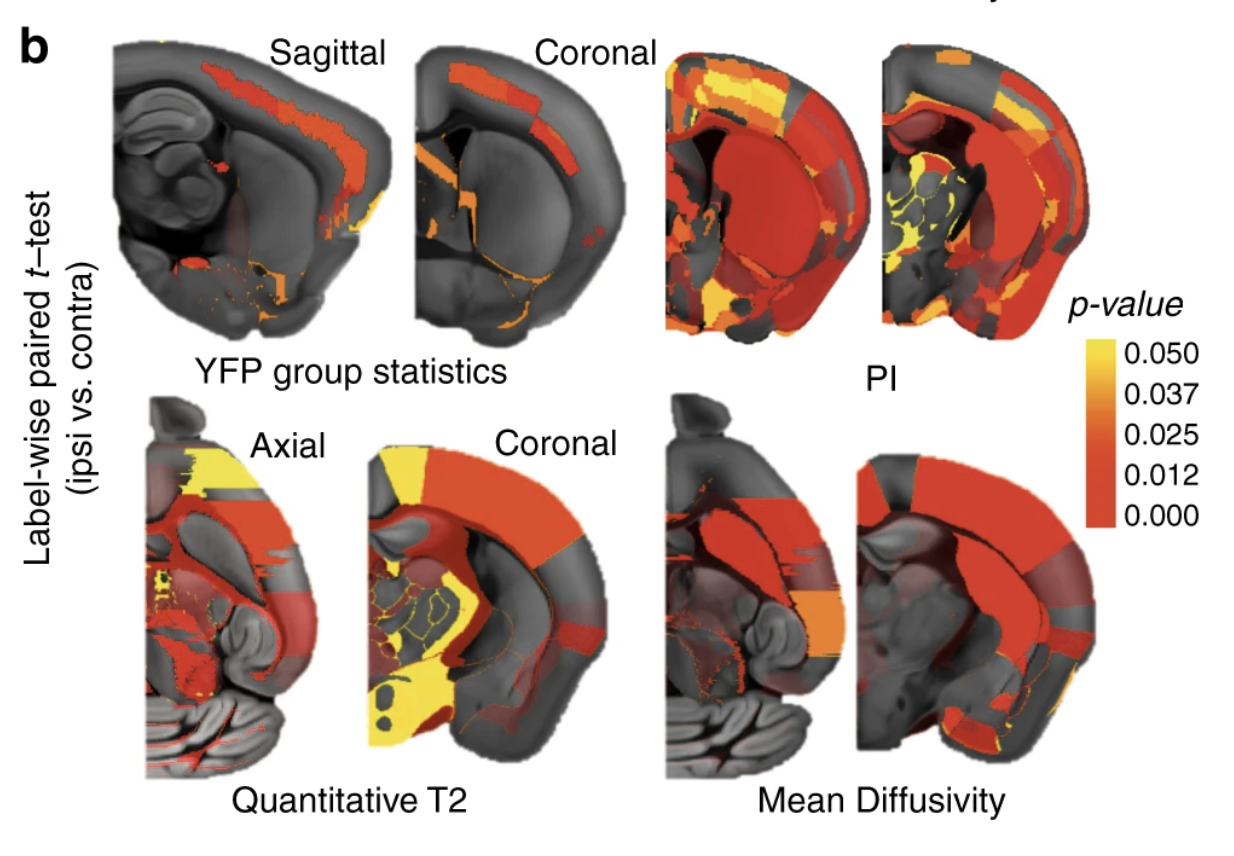

#### Additional Example
- In the below example we conducted analysis on walking versus non-walking mice
- We extract regional statistics and analyzed them using `miracl stats group_ttest` at the whole-brain level and at a depth of 6
- The results were then visualized comparing the normalized neuron density in each region, as well as displaying the regions with a significant difference between groups (as per the t-test), as seen by the stars in the charts

<img src="https://drive.google.com/uc?export=view&id=1MICyUhfSosoyWBLzEaS1mjTMPQD53YXb" width="80%">

#### Example Boxplot Outputs
- When running the regional stats command, it will also generate two output boxplots comparing the neuron density between the two groups of study
  - The first plot called `sig` shows the distribution of neuron density in all brain regions where there is a significant neuron density between the two groups (as calculated by the t-test). This significance level is determined by the user (default: `0.05`)
  - The second plot is called `trending` and shows the brain regions where the t-test returns a significance value less than `0.01` and greater than the significance value specified in the above plot
- The [`sig`](#sig) plot and [`trending`](#trending) plot example can be seen below
  - The starts above each brain ROI in the `sig` plot shows the level of significance achieved in the test (\*=0.05, \*\*=0.01, \*\*\*=0.005)

<a name="sig"></a>
<img src="https://drive.google.com/uc?export=view&id=1Dgwgo7Gk7Di6liCBtfukJoKH3WIFLX1k" width="70%">

<a name="trending"></a>
<img src="https://drive.google.com/uc?export=view&id=152qfPVe93FC5p3AIt-1W7lWefOqwXMR7" width="30%">
